# One Variable Linear Regression

## Goal

We're given a dataset that has x and y. Example:

| x | y |
|---|---|
| 1 | 12 |
| 5 | 35 |
| 8 | 48 |
| 32 | 132 |

Now we want to fit the best variable linear regression for the given data. Model:

$$ f_{w,b}(x^{(i)}) = w x^{(i)} + b $$


## Definitions

We have **m** number of data, to train our model with.

For i_th data point, we show the cordinator of the data with: $x^{(i)}$ and $y^{(i)}$

*Cost Function (J)* shows us how accurate our model is. The closer to the zero, the better.


## Solution

Cost function is square of variance which is equal to:
$$ J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$

Note: the reason the cost function is divided by two is that, later when we take derivative of the cost function, we get a simpler function (without an extra 2). 

Now we start from an initia w and b, and using this formula we find our next w, b. We continue doing it for number of times (for example 1,000 times). $\alpha$ is our step length that we take each time. The lower the $\alpha$ the more accurate step we take, but we need to take more steps to get to the ideal result. 


$$ w = w - \alpha \frac{\partial J(w,b)}{\partial w} $$
$$ b = b - \alpha \frac{\partial J(w,b)}{\partial b} $$


Now we need to find the partial derivatives. 

For w:
$$ \frac{\partial J}{\partial w} = \frac{\partial}{\partial w} (\frac{1}{2m} \sum_{i=1}^{m} ((w x^{(i)} + b - y^{(i)}) ^ 2)$$

$$\frac{\partial J}{\partial w} = \frac {1}{m} \sum_{i=1}^{m} ((w x^{(i)} + b - y^{(i)}) x^{(i)})$$

Finally by replacing the $f_{w,b}(x^{(i)})$ we get:
$$ \Rightarrow \frac{\partial J}{\partial w} = \frac {1}{m} \sum_{i=1}^{m} ((f_{w,b}(x^{(i)}) - y^{(i)}) x^{(i)})$$

Using the same method for b we get:

$$\Rightarrow \frac{\partial J}{\partial b} = \frac {1}{m} \sum_{i=1}^{m}((f_{w,b}(x^{(i)}) - y^{(i)})$$

## Code

In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
def compute_cost(x_train, y_train, w, b): 
    m = x_train.shape[0]
    
    f_wb = w * x_train + b
    error = (f_wb - y_train) ** 2
    cost = np.sum(error) / (2 * m)
    
    return cost

In [77]:
def compute_gradient(x_train, y_train, w, b):
    m = x_train.shape[0]
    f_wb = w * x_train + b
    # Note: Using built in function of numpy, we get way better performance due parallel processing
    error = f_wb - y_train
    
    dj_dw = np.dot(error, x_train) / m
    dj_db = np.sum(error) / m
    
    return dj_dw, dj_db

In [83]:
def fit_regression(x_train, y_train, initial_w, initial_b, alpha, iteration):
    w = initial_w
    b = initial_b
    
    for _ in range (iteration):
        dj_dw, dj_db = compute_gradient(x_train, y_train, w, b)
        
        # Calculating the next value for our w and b:
        w -= alpha * dj_dw
        b -= alpha * dj_db
    
    return w, b

cost: 7.177034325198229


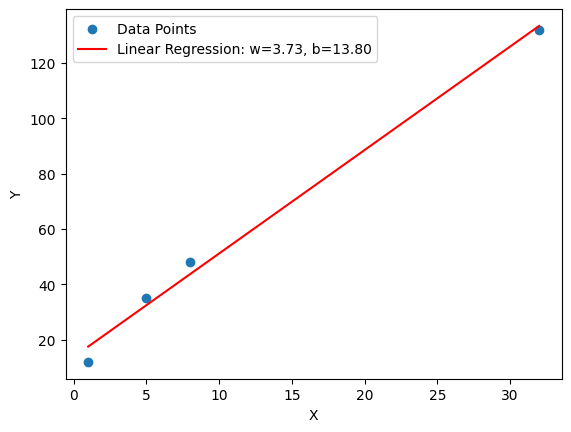

In [97]:
x_train = np.array([1.0, 5.0, 8.0, 32.0])
y_train = np.array([12.0, 35.0, 48.0, 132.0])

alpha=1.0e-5
iteration=1_000_000

w, b = fit_regression(x_train, y_train, initial_w=3.0, initial_b=13.0, alpha=alpha, iteration=iteration)

print(f"cost: {compute_cost(x_train, y_train, w, b)}")
# Plot the points
plt.scatter(x_train, y_train, label='Data Points')

# Plot the linear regression line
x_range = np.linspace(min(x_train), max(x_train), 100) # List of 100 points in our x range
y_range = w * x_range + b
plt.plot(x_range, y_range, color='red', label=f'Linear Regression: w={w:.2f}, b={b:.2f}')

# Add labels
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()